1. Given 1000 records in a dataset, 1000 models are trained with 999 records as part of
the training sample and the remaining 1 sample for testing, and the error rate is averaged out,
this validation technique is called? 

c) LOOCV

2.  In k-fold cross validation technique, the value of k being small could lead to which of
the following in relation to the error rate

c) high bias, low variance

3. In k-fold cross validation technique, the value of k being large could lead to which of
the following in relation to the error rate

b) low bias, high variance

4. Explain what regularization is and why it is useful.
Regularization is a technique that fits a model appropriatley on a given training dataset by reducing coefficents towards 0. This is useful because it prevents either overfitting or underfitting and makes the model more robust.

In [1]:
import boto3
import pandas as pd; pd.set_option('display.max_column', 100)
import numpy as np
import matplotlib.pyplot as plt

## define bucket in which you are trying to reach
s3 = boto3.resource('s3')
bucket_name = 'daltondencklau-data445-bucket'
bucket = s3.Bucket(bucket_name)


## define csv file to read in the bucket
file_key= 'framingham.csv'

## syntax to allow us to read the file
bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

## reading the data file
heart = pd.read_csv(file_content_stream)
heart.head(100)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,65,3.0,0,0.0,0.0,0,0,0,193.0,123.0,76.5,29.33,60.0,96.0,0
96,0,63,4.0,1,20.0,0.0,0,0,1,239.0,134.0,80.0,26.64,88.0,126.0,0
97,0,40,2.0,0,0.0,0.0,0,0,0,205.0,100.0,60.0,NaN,60.0,72.0,1
98,0,56,1.0,0,0.0,0.0,0,1,0,296.0,180.0,90.0,23.72,75.0,120.0,0


In [2]:
## removing missing variables
heart = heart.dropna()
heart.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
## changing variables to 0-1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
heart_scaled = pd.DataFrame(scaler.fit_transform(heart), index = heart.index, columns = heart.columns)
heart_scaled

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,0.184211,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.168378,0.106383,0.232804,0.277024,0.363636,0.104520,0.0
1,0.0,0.368421,0.333333,0.0,0.000000,0.0,0.0,0.0,0.0,0.281314,0.177305,0.349206,0.319680,0.515152,0.101695,0.0
2,1.0,0.421053,0.000000,1.0,0.285714,0.0,0.0,0.0,0.0,0.271047,0.208038,0.338624,0.237518,0.313131,0.084746,0.0
3,0.0,0.763158,0.666667,1.0,0.428571,0.0,0.0,1.0,0.0,0.229979,0.314421,0.497354,0.316045,0.212121,0.177966,1.0
4,0.0,0.368421,0.666667,1.0,0.328571,0.0,0.0,0.0,0.0,0.353183,0.219858,0.380952,0.183228,0.414141,0.127119,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1.0,0.684211,0.666667,0.0,0.000000,0.0,0.0,1.0,0.0,0.151951,0.271868,0.349206,0.228308,0.363636,0.115819,0.0
4232,1.0,0.947368,0.000000,0.0,0.000000,0.0,0.0,1.0,0.0,0.129363,0.399527,0.518519,0.184198,0.161616,0.110169,1.0
4233,1.0,0.473684,0.000000,1.0,0.014286,0.0,0.0,1.0,0.0,0.410678,0.451537,0.465608,0.252787,0.222222,0.129944,1.0
4234,1.0,0.500000,0.666667,1.0,0.614286,0.0,0.0,0.0,0.0,0.193018,0.203310,0.338624,0.101066,0.212121,0.079096,0.0


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

## defining input and target variables
X = heart_scaled[['age', 'currentSmoker', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]
Y = heart_scaled['TenYearCHD']

## defining the number of folds we want
kf = KFold(n_splits = 5, shuffle = True)

## defining the list to store the results
f1score1 = list()
f1score2 = list()

## verifying that I defined three folds
kf.get_n_splits(heart)

5

In [5]:
## defining the loop
for train_idx, val_idx in kf.split(X):
    
    ## splitting the data into train and validation
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    Y_train, Y_val = Y.iloc[train_idx], Y.iloc[val_idx]
    
    ## defining input variables for model 1
    X1 = X_train[['age', 'currentSmoker', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]
    X_val_1 = X_val[['age', 'currentSmoker', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]
    
    ## defining the input variables for model 2
    X2 = X_train[['age', 'currentSmoker', 'totChol', 'BMI', 'heartRate', 'glucose']]
    X_val_2 = X_val[['age', 'currentSmoker', 'totChol', 'BMI', 'heartRate', 'glucose']]
  
    ## Building the logistic regression model
    md1 = LogisticRegression().fit(X1, Y_train)
    md2 = LogisticRegression().fit(X2, Y_train)
    
    ## Predicting on the validation set
    pred1 = md1.predict(X_val_1)
    pred2 = md2.predict(X_val_2)
    
    ## setting 25% threshold
    pred1 = np.where(pred1 >= 0.25, 0, 1)
    pred2 = np.where(pred2 >= 0.25, 0, 1)
    
    ## calculating f1 score for both models
    md1_f1score = f1_score(Y_val, pred1)
    md2_f1score = f1_score(Y_val, pred2)
    
    ## storing F1 score in a list
    f1score1.append(md1_f1score)
    f1score2.append(md2_f1score)

In [6]:
## printing each iteration
print(f1score1)
print(f1score2)

[0.25240384615384615, 0.2521008403361345, 0.26397146254458975, 0.25, 0.27455621301775146]
[0.25567502986857826, 0.2562874251497006, 0.265717674970344, 0.25952380952380955, 0.2762691853600944]


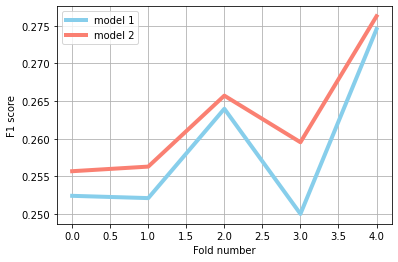

In [7]:
## visualizing f1 scores
plt.plot(f1score1 , linewidth = 4, color = 'skyblue')
plt.plot(f1score2 , linewidth = 4, color = 'salmon')
plt.xlabel('Fold number')
plt.ylabel('F1 score')
plt.legend(loc = 'upper left', labels = ['model 1', 'model 2'])
plt.grid()
plt.grid
plt.show;

In [8]:
## calculating the average f1 score for both models
print('The average f1 score of Model 1 is', np.mean(f1score1))
print('The average f1 score of Model 2 is', np.mean(f1score2))

The average f1 score of Model 1 is 0.25860647241046436
The average f1 score of Model 2 is 0.26269462497450535


Based on the average f1 scores of each model, I would chose model 2 because its average is closer to 1.